In [ ]:
import pandas as pd
datos = pd.read_csv("uac_limpio.csv")


In [ ]:
datos.head()

,ESCUELA,SEDE,EDAD,PROMEDIO,EXCELENCIA,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE
0,ADMINISTRACIÓN,CUSCO,20,16.466,0,1,0,0,0,0,2,4
1,ADMINISTRACIÓN,QUILLABAMBA,27,19.103,1,0,0,0,1,0,2,5
2,ADMINISTRACIÓN,CUSCO,22,14.318,0,0,0,0,1,1,1,10
3,ADMINISTRACIÓN,QUILLABAMBA,27,14.088,0,1,2,1,1,1,2,7
4,ADMINISTRACIÓN,QUILLABAMBA,31,15.463,0,0,0,0,1,1,2,10


In [ ]:
datos.describe()

,EDAD,PROMEDIO,EXCELENCIA,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE
count,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000
mean,23.127823,15.233239,0.292118,0.556911,0.118790,0.097448,0.640018,0.333559,0.996725,6.574864
std,4.743533,2.462456,0.454762,0.496779,0.449987,0.296584,0.480022,0.471511,0.814251,3.196843
min,16.000000,11.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,13.087750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,22.000000,15.207500,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.000000
75%,25.000000,17.346250,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,9.000000
max,59.000000,19.500000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,14.000000


In [ ]:
dummies_est_civil = pd.get_dummies(datos['EST_CIVIL'], prefix='EST_CIVIL', drop_first=True)
dummies_nivel_socio = pd.get_dummies(datos['NIVEL_SOCIO_ECON'], prefix='NIVEL_SOCIO_ECON', drop_first=True)
dummies_escuela = pd.get_dummies(datos['ESCUELA'], prefix='ESCUELA', drop_first=True)
dummies_sede = pd.get_dummies(datos['SEDE'], prefix='SEDE', drop_first=True)

# Unir las columnas dummy al dataframe original
datos = datos.join(dummies_est_civil)
datos = datos.join(dummies_nivel_socio)
datos = datos.join(dummies_escuela)
datos = datos.join(dummies_sede)

# Eliminar las columnas originales categóricas que fueron convertidas
datos = datos.drop(['ESCUELA', 'SEDE','EST_CIVIL', 'NIVEL_SOCIO_ECON', ], axis=1)

In [ ]:
datos.head()

,EDAD,PROMEDIO,EXCELENCIA,SEXO,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,SEMESTRE,EST_CIVIL_1,EST_CIVIL_2,...,ESCUELA_MARKETING,ESCUELA_MEDICINA HUMANA,ESCUELA_MOVILIDAD ESTUDIANTIL,ESCUELA_OBSTETRICIA,ESCUELA_PSICOLOGÍA,ESCUELA_TECNOLOGÍA MÉDICA,ESCUELA_TURISMO,SEDE_PUERTO MALDONADO,SEDE_QUILLABAMBA,SEDE_SICUANI
0,20,16.466,0,1,0,0,0,4,False,False,...,False,False,False,False,False,False,False,False,False,False
1,27,19.103,1,0,0,1,0,5,False,False,...,False,False,False,False,False,False,False,False,True,False
2,22,14.318,0,0,0,1,1,10,False,False,...,False,False,False,False,False,False,False,False,False,False
3,27,14.088,0,1,1,1,1,7,False,True,...,False,False,False,False,False,False,False,False,True,False
4,31,15.463,0,0,0,1,1,10,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
datoswoprom = datos.drop(["PROMEDIO"], axis=1)

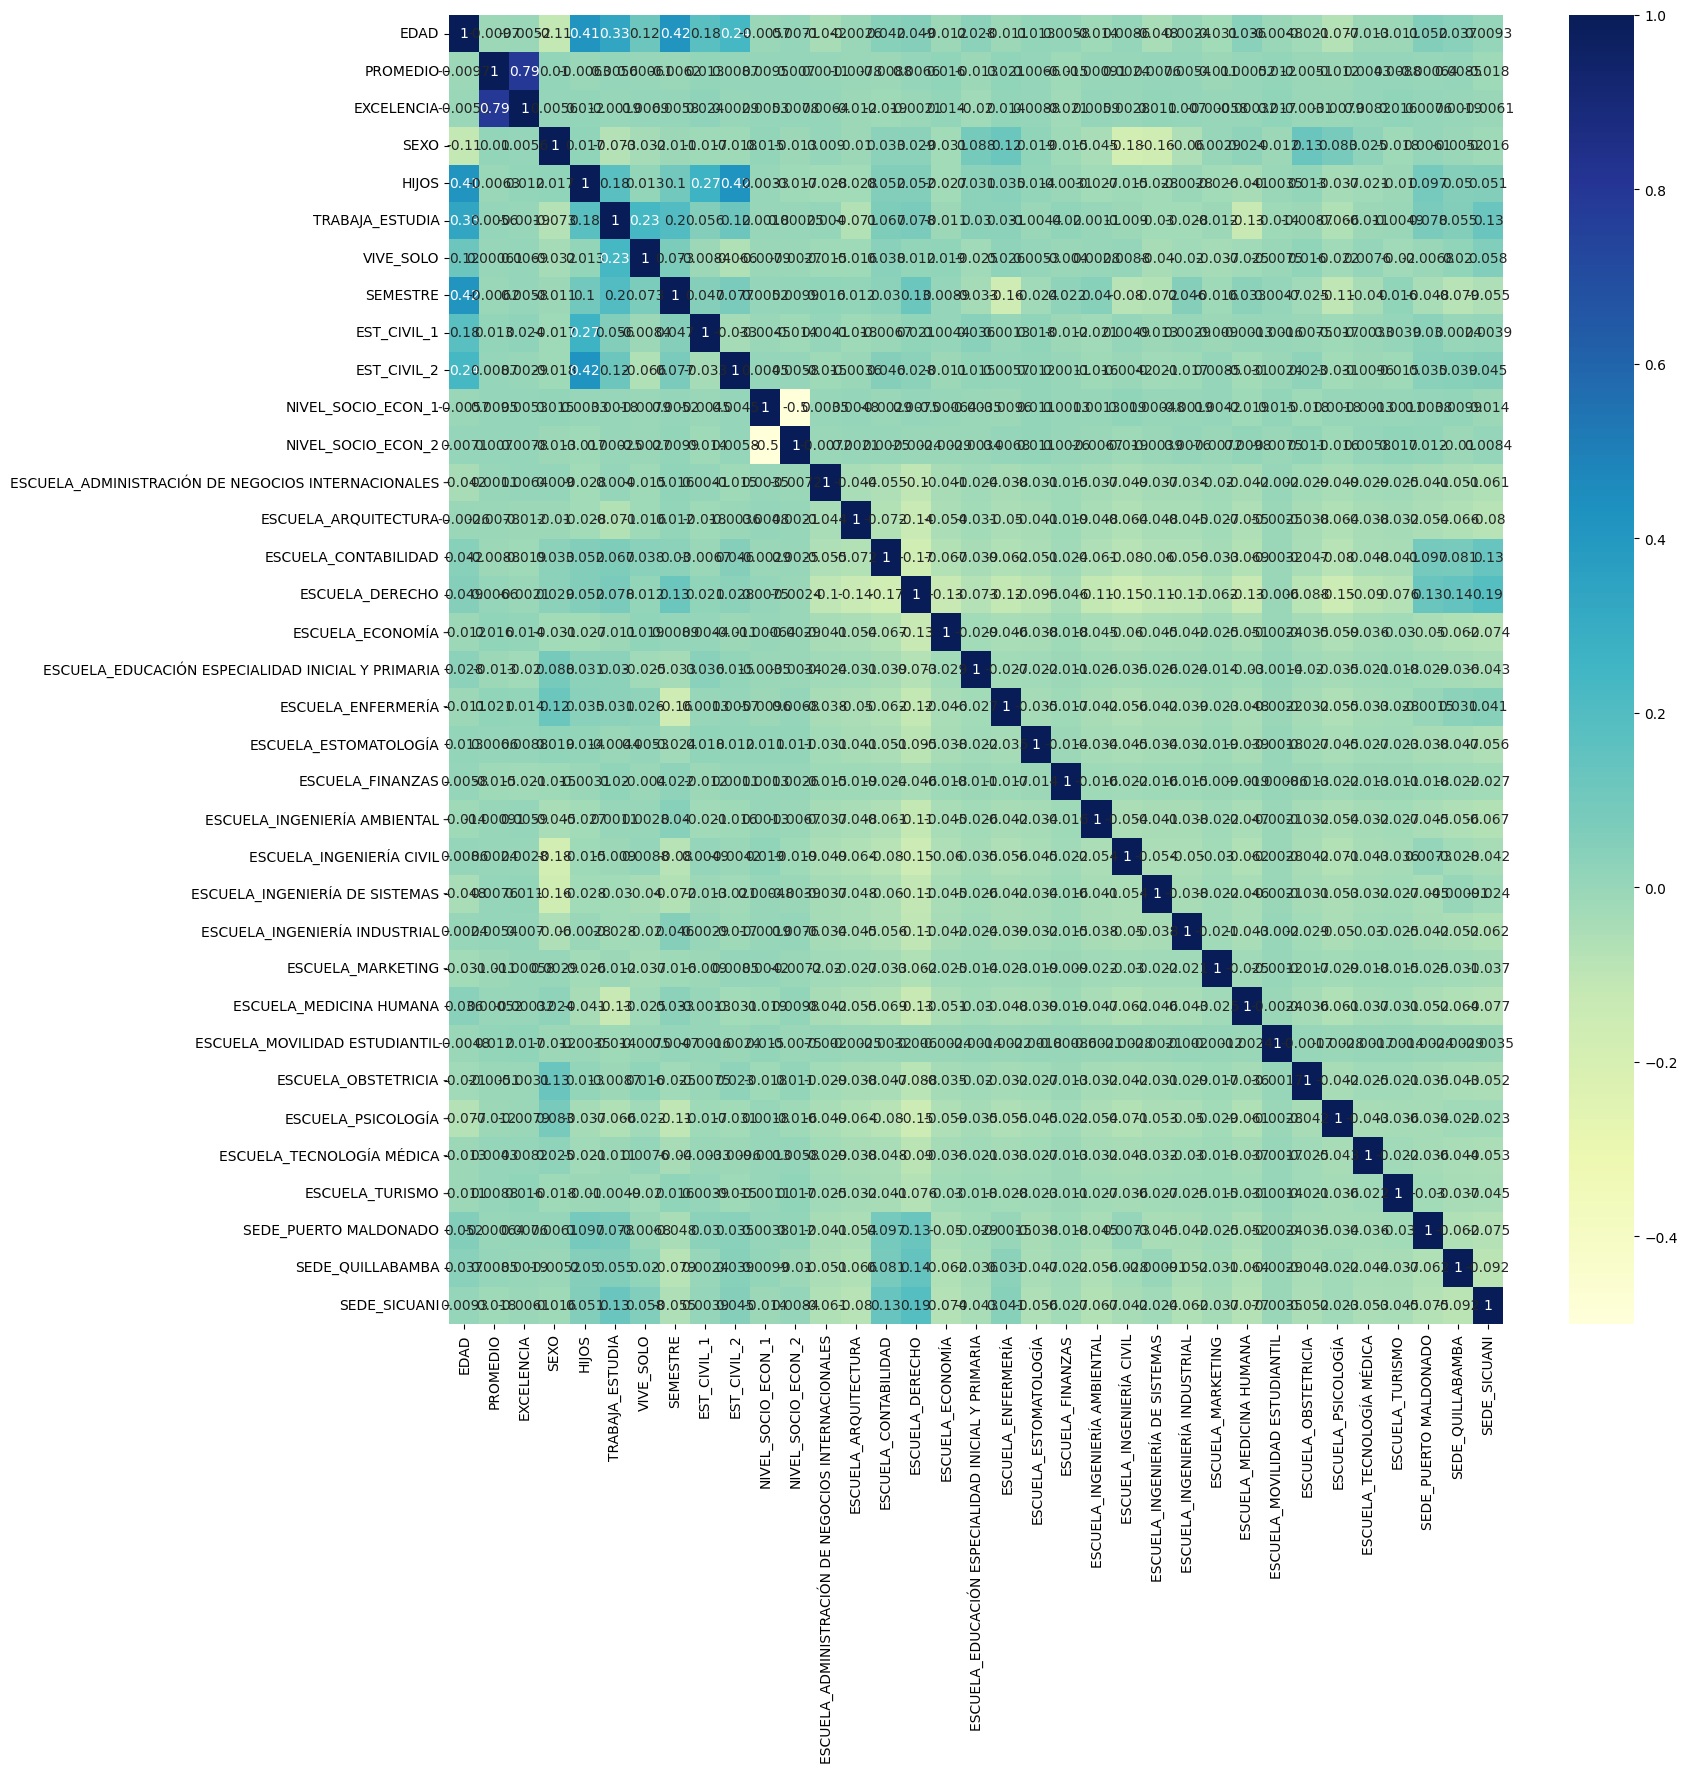

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(17, 17))  # Ajusta el tamaño según sea necesario
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")
plt.show()

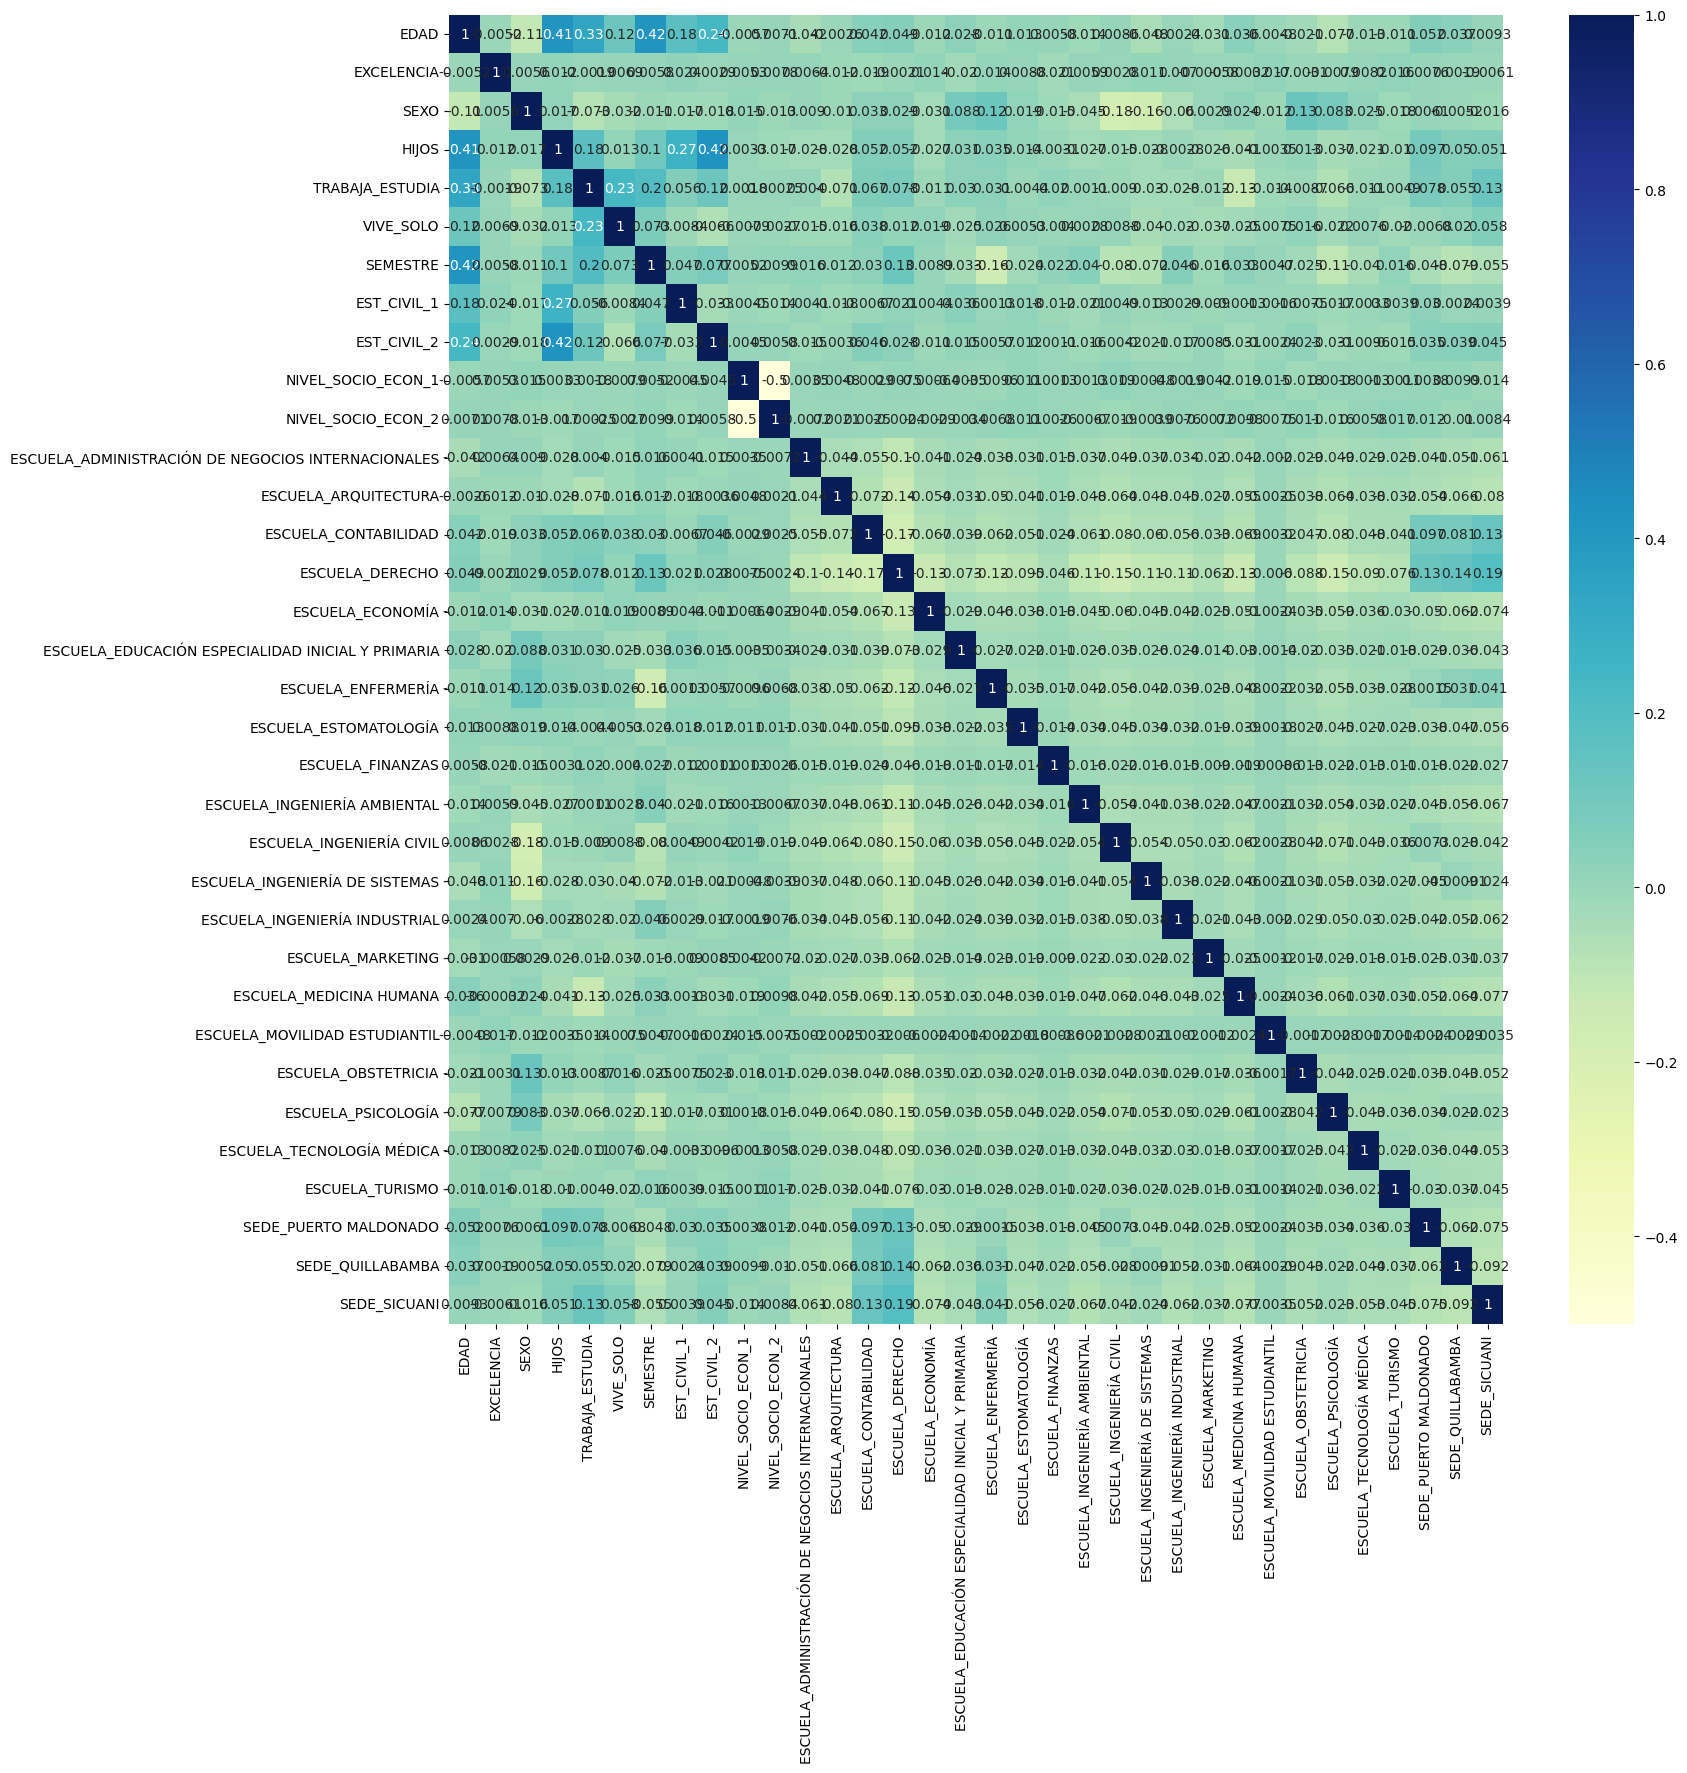

In [ ]:
plt.figure(figsize=(17, 17))  # Ajusta el tamaño según sea necesario
sb.heatmap(datoswoprom.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
#Sin promedio
A = datoswoprom.drop(["EXCELENCIA"], axis=1)
b = datoswoprom["EXCELENCIA"]

In [ ]:
#incluye promedio
X = datos.drop(["EXCELENCIA"], axis=1)
y = datos["EXCELENCIA"]

In [ ]:
#Sin promedio
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba
A_ent, A_pru, b_ent, b_pru = train_test_split(A, b, test_size=0.2, random_state=42)

In [ ]:
#incluye promedio
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#sin promedio
from sklearn.tree import DecisionTreeClassifier
modeloprom = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
modeloprom.fit(A_ent, b_ent)
prediccionesprom = modeloprom.predict(A_pru)

In [ ]:
#incluye promedio
modelo = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [ ]:
#sin promedio
from sklearn.metrics import accuracy_score
accuracy_score(b_pru, prediccionesprom)

0.6884875846501128

In [ ]:
#incluye promedio
accuracy_score(y_pru, predicciones)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5)  # 5-fold cross-validation
scoresprom = cross_val_score(modelo, A, b, cv=5)
print(f"Precisión media de validación cruzada: {scores.mean()}")
print(f"Precisión sin Promedio media de validación cruzada: {scoresprom.mean()}")

Precisión media de validación cruzada: 1.0
Precisión sin Promedio media de validación cruzada: 0.660454679288716


In [ ]:
print(f"Tamaño de X_ent: {len(X_ent)}, Tamaño de A_ent: {len(A_ent)}")
print(f"Tamaño de X_pru: {len(X_pru)}, Tamaño de A_pru: {len(A_pru)}")


Tamaño de X_ent: 7084, Tamaño de A_ent: 7084
Tamaño de X_pru: 1772, Tamaño de A_pru: 1772


In [ ]:
#Con promedio
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Random Forest
rf_modelo = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_modelo.fit(X_ent, y_ent)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
#Sin promedio
rfprom_modelo = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfprom_modelo.fit(A_ent, b_ent)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
#Incluye promedio
y_pred = rf_modelo.predict(X_pru)

In [ ]:
#Sin promedio
b_pred = rfprom_modelo.predict(A_pru)

In [ ]:
#Incluye promedio
accuracy_score(y_pru, y_pred)

1.0

In [ ]:
#sin promedio
accuracy_score(b_pru, b_pred)

0.7116252821670429

In [ ]:
#Incluye Promedio
classification_report(y_pru, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1261\n           1       1.00      1.00      1.00       511\n\n    accuracy                           1.00      1772\n   macro avg       1.00      1.00      1.00      1772\nweighted avg       1.00      1.00      1.00      1772\n'

In [ ]:
#sin promedio
classification_report(b_pru, b_pred, zero_division=1)

'              precision    recall  f1-score   support\n\n           0       0.71      1.00      0.83      1261\n           1       1.00      0.00      0.00       511\n\n    accuracy                           0.71      1772\n   macro avg       0.86      0.50      0.42      1772\nweighted avg       0.79      0.71      0.59      1772\n'

In [ ]:
#Incluye promedio
confusion_matrix(y_pru, y_pred)

array([[1261,    0],
       [   0,  511]])

In [ ]:
#sin promedio
confusion_matrix(b_pru, b_pred)

array([[1261,    0],
       [ 511,    0]])

RandomForest Ajuste de hiperparametros

In [ ]:
#sin promedio Ajuste de hiperparametros
from sklearn.model_selection import GridSearchCV
parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=parametros, cv=5)

In [ ]:
grid_search.fit(A_ent, b_ent)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
rf_gridmodelo = grid_search.best_estimator_
rf_gridmodelo = rf_gridmodelo.predict(A_pru)

In [ ]:
accuracy_score(b_pru, rf_gridmodelo)

0.7116252821670429

71% precision Random Forest Hiperparametrizacion

# Nueva sección
Sin Promedio

In [ ]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(A_ent, b_ent)
  predicciones = modelo.predict(A_pru)
  exactitud = accuracy_score(b_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.7116252821670429
Resultado para 2: 0.7099322799097065
Resultado para 3: 0.7099322799097065
Resultado para 4: 0.7082392776523702
Resultado para 5: 0.7071106094808126
Resultado para 6: 0.7082392776523702
Resultado para 7: 0.7071106094808126
Resultado para 8: 0.6952595936794582
Resultado para 9: 0.6969525959367946
Resultado para 10: 0.6935665914221218
Resultado para 11: 0.690744920993228
Resultado para 12: 0.6800225733634312
Resultado para 13: 0.6800225733634312
Resultado para 14: 0.672686230248307


<Axes: >

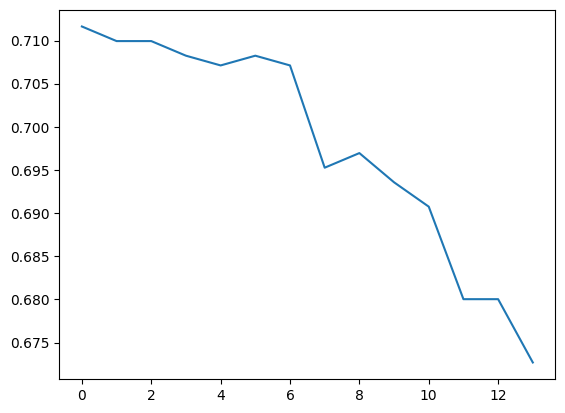

In [ ]:
sb.lineplot(data=resultados)

En base a los resultado hay overfitting

In [ ]:
from sklearn.model_selection import cross_val_score
profundidades = range(1, 15)
resultados_cv = []

In [ ]:
for i in profundidades:
    modelo = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(modelo, A_ent, b_ent, cv=5, scoring='accuracy')
    resultados_cv.append(scores.mean())

In [ ]:
for i, resultado in enumerate(resultados_cv, start=1):
    print(f"Profundidad {i}: Precisión promedio en validación cruzada = {resultado}")

Profundidad 1: Precisión promedio en validación cruzada = 0.7069452252510875
Profundidad 2: Precisión promedio en validación cruzada = 0.7066629387302689
Profundidad 3: Precisión promedio en validación cruzada = 0.7066629387302689
Profundidad 4: Precisión promedio en validación cruzada = 0.7053919516444784
Profundidad 5: Precisión promedio en validación cruzada = 0.7046867337296508
Profundidad 6: Precisión promedio en validación cruzada = 0.7028518713443297
Profundidad 7: Precisión promedio en validación cruzada = 0.69678141533996
Profundidad 8: Precisión promedio en validación cruzada = 0.6973458887041535
Profundidad 9: Precisión promedio en validación cruzada = 0.6953700824133106
Profundidad 10: Precisión promedio en validación cruzada = 0.6922648310068619
Profundidad 11: Precisión promedio en validación cruzada = 0.6900052430335435
Profundidad 12: Precisión promedio en validación cruzada = 0.6861941756476043
Profundidad 13: Precisión promedio en validación cruzada = 0.68097107759290

Data set Error?

Proseguimos

In [ ]:
modelo = DecisionTreeClassifier(max_depth=7)
modelo.fit(A_ent, b_ent)
predicciones = modelo.predict(A_pru)
exactitud = accuracy_score(b_pru, predicciones)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(b_pru, predicciones))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      1261
           1       0.26      0.01      0.02       511

    accuracy                           0.71      1772
   macro avg       0.49      0.50      0.42      1772
weighted avg       0.58      0.71      0.59      1772



In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(b_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,1247,14
Real: Si,506,5


In [ ]:
A_ent.columns

Index(['EDAD', 'SEXO', 'HIJOS', 'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'SEMESTRE',
       'EST_CIVIL_1', 'EST_CIVIL_2', 'NIVEL_SOCIO_ECON_1',
       'NIVEL_SOCIO_ECON_2',
       'ESCUELA_ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES',
       'ESCUELA_ARQUITECTURA', 'ESCUELA_CONTABILIDAD', 'ESCUELA_DERECHO',
       'ESCUELA_ECONOMÍA', 'ESCUELA_EDUCACIÓN ESPECIALIDAD INICIAL Y PRIMARIA',
       'ESCUELA_ENFERMERÍA', 'ESCUELA_ESTOMATOLOGÍA', 'ESCUELA_FINANZAS',
       'ESCUELA_INGENIERÍA AMBIENTAL', 'ESCUELA_INGENIERÍA CIVIL',
       'ESCUELA_INGENIERÍA DE SISTEMAS', 'ESCUELA_INGENIERÍA INDUSTRIAL',
       'ESCUELA_MARKETING', 'ESCUELA_MEDICINA HUMANA',
       'ESCUELA_MOVILIDAD ESTUDIANTIL', 'ESCUELA_OBSTETRICIA',
       'ESCUELA_PSICOLOGÍA', 'ESCUELA_TECNOLOGÍA MÉDICA', 'ESCUELA_TURISMO',
       'SEDE_PUERTO MALDONADO', 'SEDE_QUILLABAMBA', 'SEDE_SICUANI'],
      dtype='object')

[Text(0.4615885416666667, 0.9375, 'ESCUELA_CONTABILIDAD <= 0.5\n0.414\n7084\n[5008, 2076]\nExcelente'),
 Text(0.17708333333333334, 0.8125, 'EDAD <= 55.0\n0.418\n6503\n[4572, 1931]\nExcelente'),
 Text(0.16666666666666666, 0.6875, 'SEMESTRE <= 3.5\n0.417\n6501\n[4572, 1929]\nExcelente'),
 Text(0.078125, 0.5625, 'ESCUELA_EDUCACIÓN ESPECIALIDAD INICIAL Y PRIMARIA <= 0.5\n0.399\n1485\n[1077, 408]\nExcelente'),
 Text(0.052083333333333336, 0.4375, 'EDAD <= 40.5\n0.401\n1450\n[1047, 403]\nExcelente'),
 Text(0.041666666666666664, 0.3125, 'EDAD <= 31.5\n0.403\n1442\n[1039, 403]\nExcelente'),
 Text(0.020833333333333332, 0.1875, 'ESCUELA_MARKETING <= 0.5\n0.4\n1409\n[1020, 389]\nExcelente'),
 Text(0.010416666666666666, 0.0625, '0.397\n1389\n[1009, 380]\nExcelente'),
 Text(0.03125, 0.0625, '0.495\n20\n[11, 9]\nExcelente'),
 Text(0.0625, 0.1875, 'EDAD <= 33.5\n0.489\n33\n[19, 14]\nExcelente'),
 Text(0.052083333333333336, 0.0625, '0.459\n14\n[5, 9]\nNo Excelente'),
 Text(0.07291666666666667, 0.0625, 

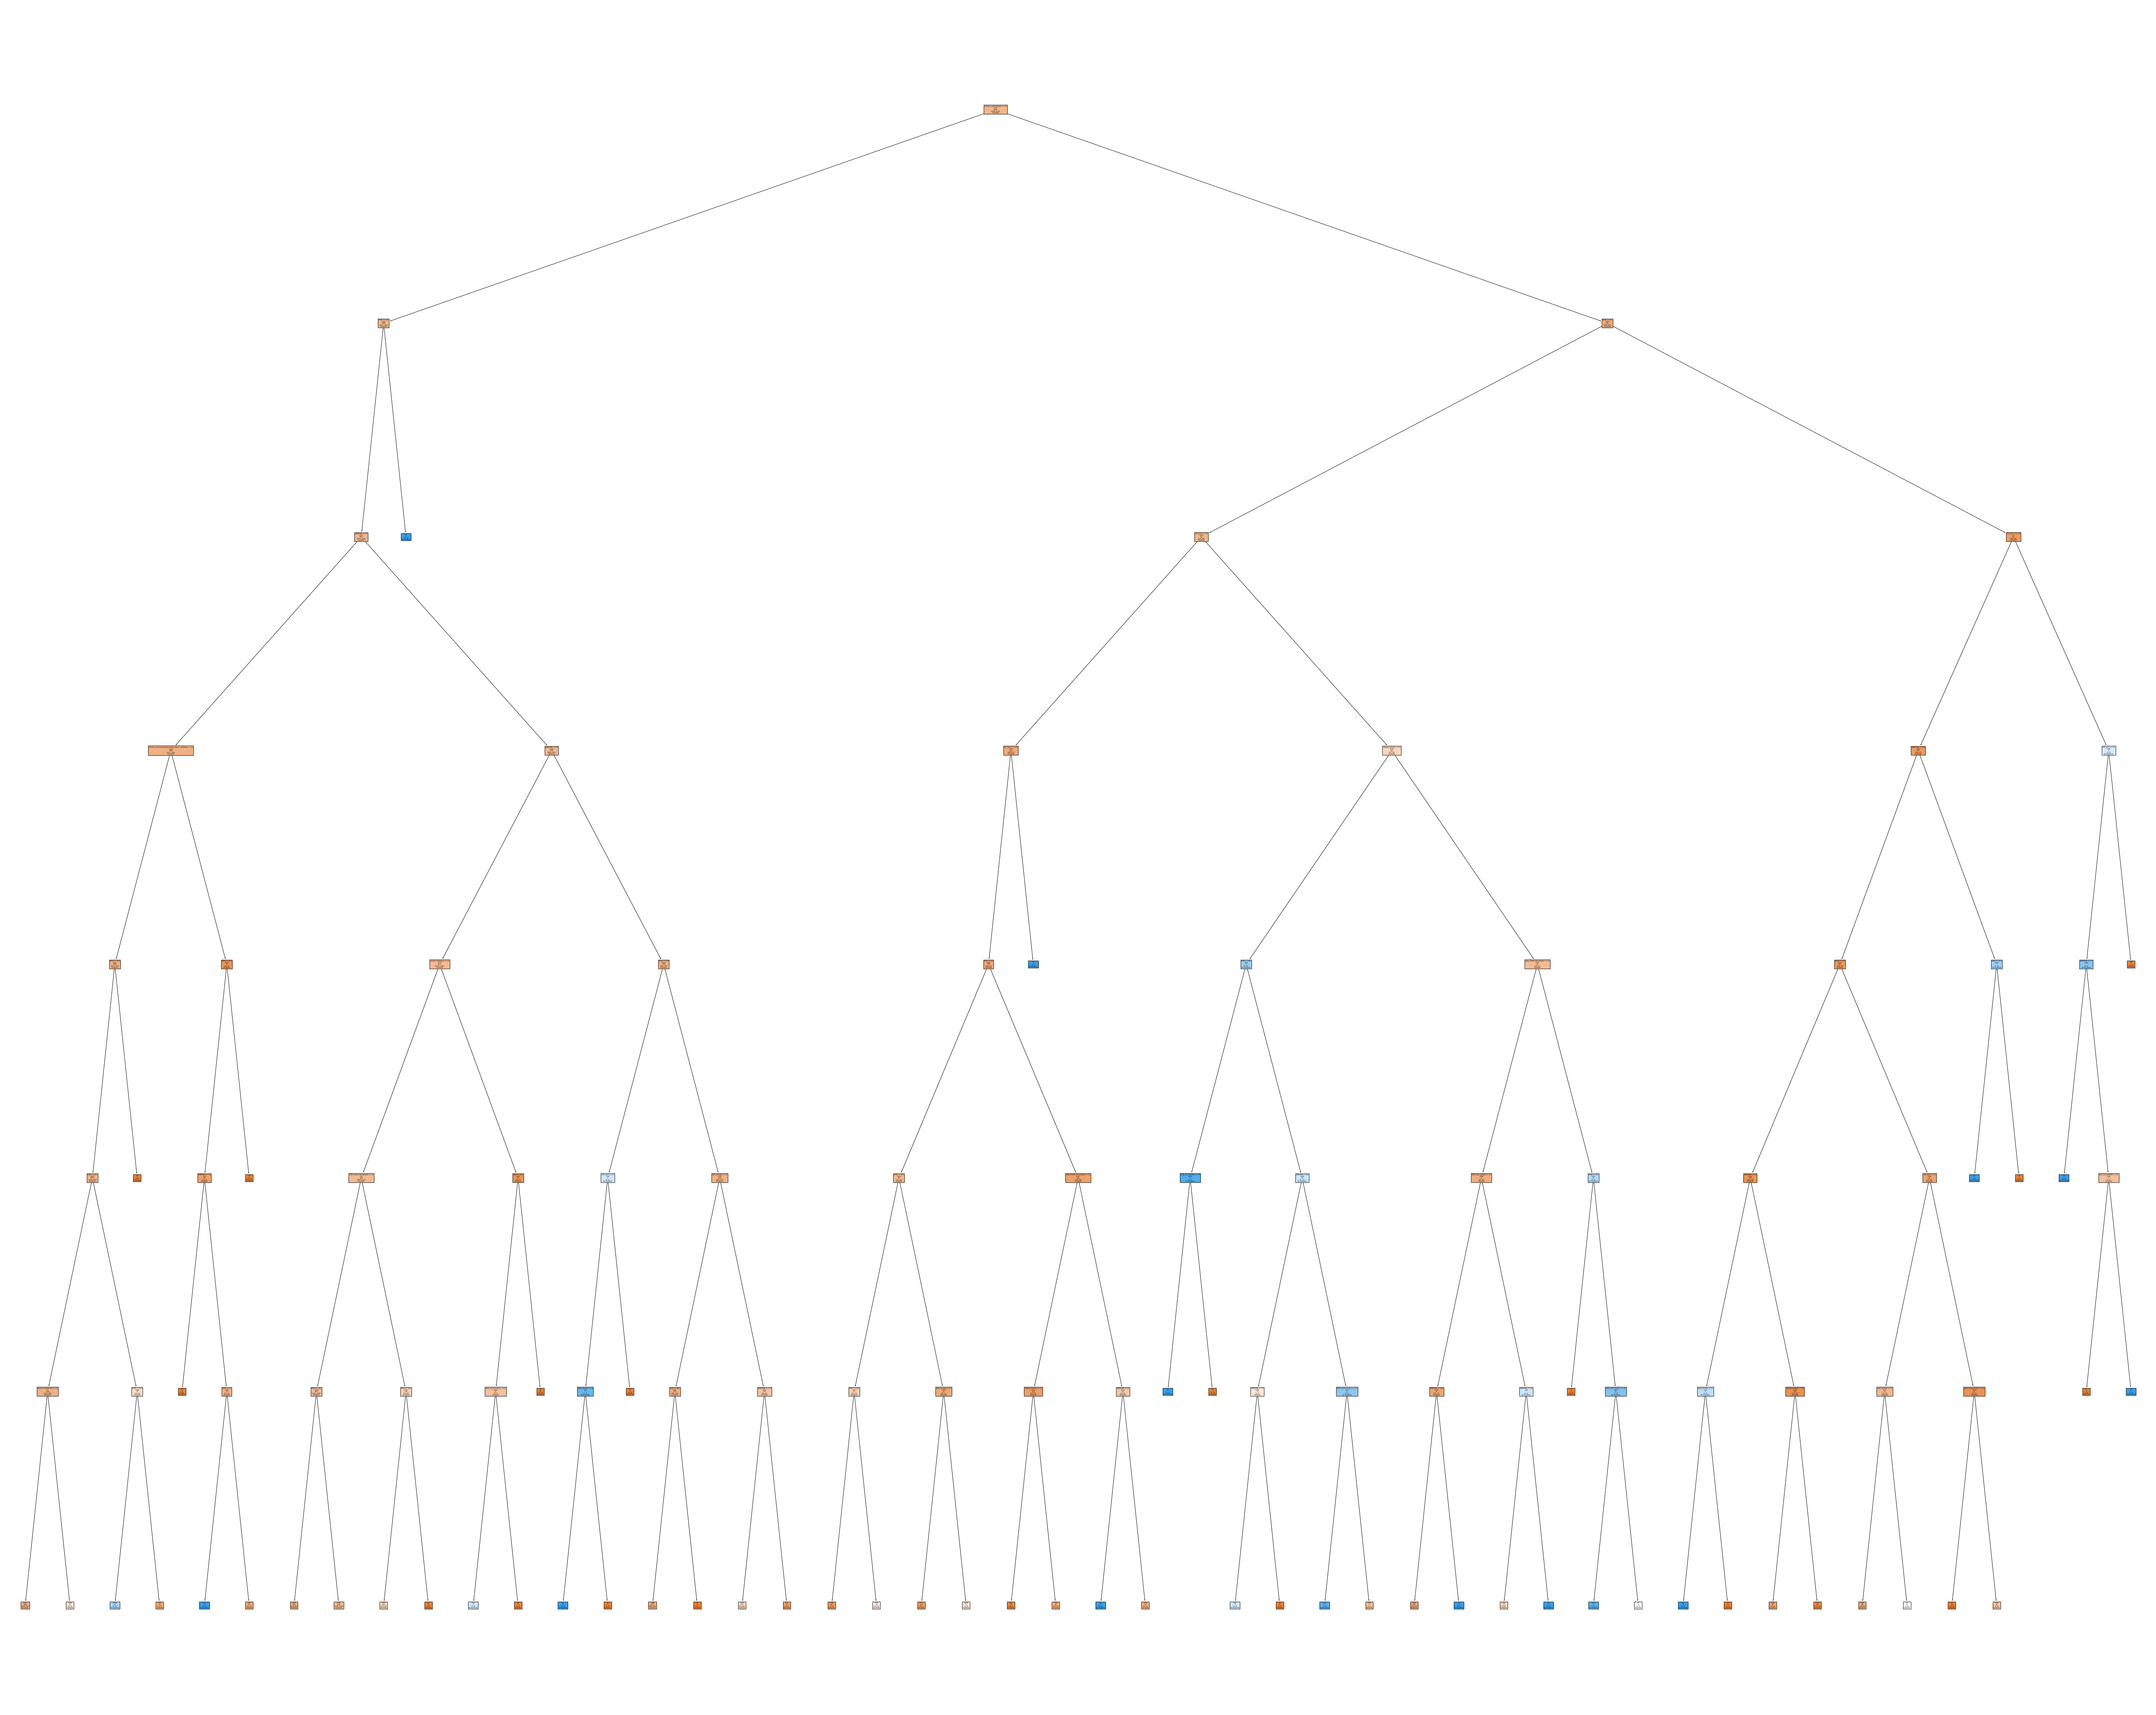

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=A_ent.columns,
    class_names=["Excelente", "No Excelente"],
    filled=True, label="none"
)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(b_pru, predicciones)

0.7065462753950339

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(b_pru, predicciones))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      1261
           1       0.26      0.01      0.02       511

    accuracy                           0.71      1772
   macro avg       0.49      0.50      0.42      1772
weighted avg       0.58      0.71      0.59      1772



In [ ]:
A.head()

,EDAD,SEXO,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,SEMESTRE,EST_CIVIL_1,EST_CIVIL_2,NIVEL_SOCIO_ECON_1,NIVEL_SOCIO_ECON_2,...,ESCUELA_MARKETING,ESCUELA_MEDICINA HUMANA,ESCUELA_MOVILIDAD ESTUDIANTIL,ESCUELA_OBSTETRICIA,ESCUELA_PSICOLOGÍA,ESCUELA_TECNOLOGÍA MÉDICA,ESCUELA_TURISMO,SEDE_PUERTO MALDONADO,SEDE_QUILLABAMBA,SEDE_SICUANI
0,20,1,0,0,0,4,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,27,0,0,1,0,5,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,22,0,0,1,1,10,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,27,1,1,1,1,7,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
4,31,0,0,1,1,10,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
pd.set_option('display.max_columns', None)
A.head(1)

,EDAD,SEXO,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,SEMESTRE,EST_CIVIL_1,EST_CIVIL_2,NIVEL_SOCIO_ECON_1,NIVEL_SOCIO_ECON_2,ESCUELA_ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,ESCUELA_ARQUITECTURA,ESCUELA_CONTABILIDAD,ESCUELA_DERECHO,ESCUELA_ECONOMÍA,ESCUELA_EDUCACIÓN ESPECIALIDAD INICIAL Y PRIMARIA,ESCUELA_ENFERMERÍA,ESCUELA_ESTOMATOLOGÍA,ESCUELA_FINANZAS,ESCUELA_INGENIERÍA AMBIENTAL,ESCUELA_INGENIERÍA CIVIL,ESCUELA_INGENIERÍA DE SISTEMAS,ESCUELA_INGENIERÍA INDUSTRIAL,ESCUELA_MARKETING,ESCUELA_MEDICINA HUMANA,ESCUELA_MOVILIDAD ESTUDIANTIL,ESCUELA_OBSTETRICIA,ESCUELA_PSICOLOGÍA,ESCUELA_TECNOLOGÍA MÉDICA,ESCUELA_TURISMO,SEDE_PUERTO MALDONADO,SEDE_QUILLABAMBA,SEDE_SICUANI
0,20,1,0,0,0,4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
nueva_persona = [20	,1,	0,	0,	0,	4,	False,	False,	False,	True,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Excelencia")
else:
  print("No Excelencia")

No Excelencia


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
